In [54]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [55]:
values = np.random.random_sample((100,))
print(values)
print(f"Max value: {np.max(values)}, Min value: {np.min(values)}")

[0.86750333 0.43047514 0.08649742 0.92218166 0.112934   0.29397965
 0.74702247 0.4318812  0.01386584 0.08540586 0.2616377  0.6127929
 0.71629159 0.44759146 0.638854   0.76982893 0.79862011 0.80501604
 0.1192808  0.73329876 0.37582977 0.57344946 0.69064112 0.74594388
 0.42072228 0.57039277 0.51322517 0.53923842 0.47517831 0.65861192
 0.38286552 0.27110183 0.68580486 0.66169415 0.49348068 0.58669128
 0.88293354 0.05574465 0.44994657 0.56556406 0.8781817  0.83702499
 0.60154412 0.07510411 0.13767658 0.91660822 0.0932712  0.77755738
 0.69577611 0.17332458 0.87014632 0.47960661 0.90487699 0.10763929
 0.10893408 0.84018652 0.10038704 0.6610103  0.87324639 0.12520271
 0.70067957 0.45365268 0.67601456 0.15890891 0.41873289 0.4314013
 0.76267978 0.65664567 0.84882568 0.79315067 0.65148835 0.37097434
 0.77446983 0.18892733 0.98520184 0.48662488 0.75516991 0.49486283
 0.13177861 0.16130895 0.13932262 0.09722902 0.01564838 0.29501868
 0.60654639 0.12638261 0.59499295 0.90002109 0.0296532  0.362552

In [56]:
def histogram_1D(data, bins):
    min_val = np.min(data)
    max_val = np.max(data)

    bin_width = (max_val - min_val) / bins

    hist = [0] * bins

    for value in data:
        bin_index = int((value - min_val) / bin_width)
        if bin_index == bins:
            bin_index -= 1
        hist[bin_index] += 1
    
    return hist

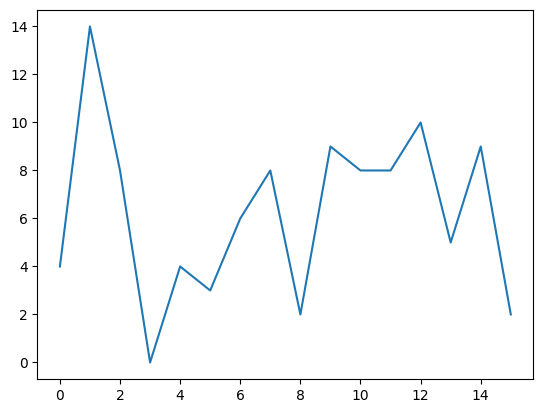

In [57]:
# Define the number of bins for the histogram
bins = 16

# Initialize an array to store the histogram values, all set to zero
histogram_values = histogram_1D(values, bins)

plt.plot(histogram_values)

plt.show()

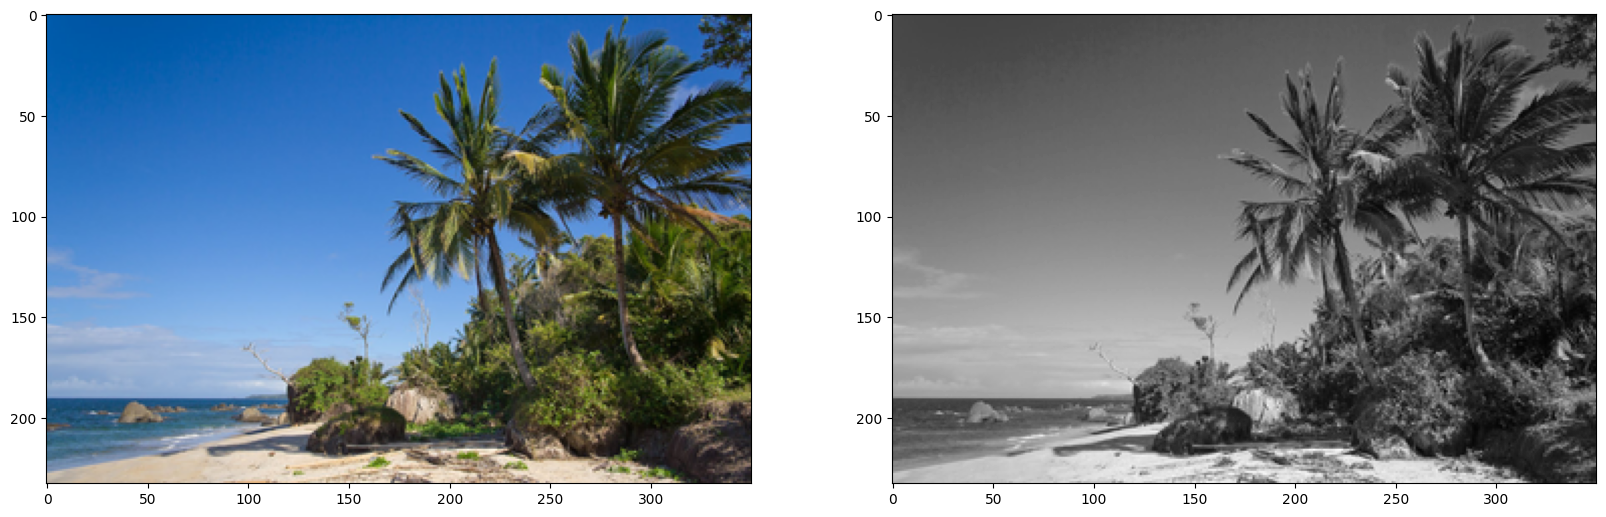

In [58]:
image = cv2.imread('/home/mtumalan/Desktop/Repos/Clases/ConcentracionIA/Octavio(Imagenes)/DL_Data_sets/images/beach.png')
# image = cv2.imread('images/olympus.jpg')


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(gray_image, cmap = 'gray')

In [59]:
def histogram_2D(image, bins):
    # Histogram for grayscale image

    min_val = np.min(image)
    max_val = np.max(image)

    bin_width = (max_val - min_val) / bins

    hist = [0] * bins  # Initialize hist as a list

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            bin_index = int((image[i, j] - min_val) / bin_width)
            if bin_index == bins:
                bin_index -= 1
            hist[bin_index] += 1

    return hist

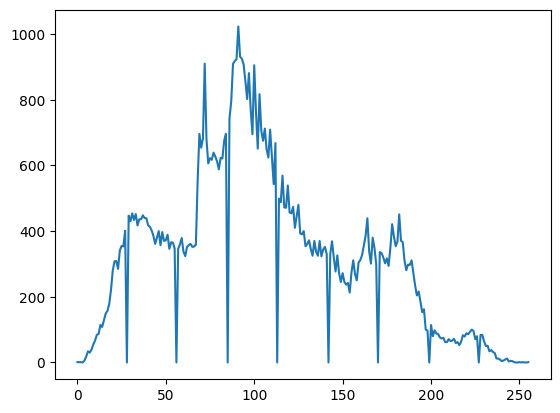

In [60]:
bins = 256
histogram_values = histogram_2D(gray_image, bins)

plt.plot(histogram_values)
plt.show()

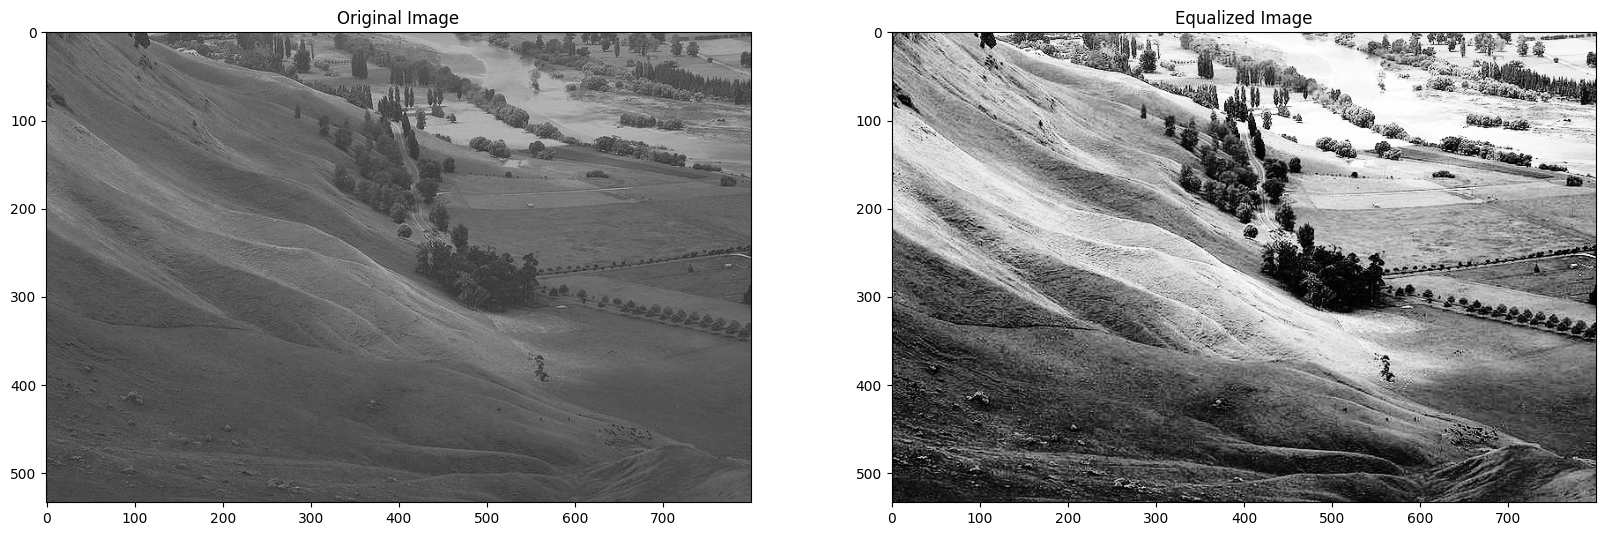

In [68]:
def histogram_equalization(image):
    # Calculate the histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Normalize the histogram
    hist_normalized = hist / hist.sum()
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist_normalized.cumsum()
    
    # Create the lookup table
    L = 256
    lookup_table = (L - 1) * cdf
    
    # Apply the lookup table to transform the pixel intensities of the original image
    equalized_image = lookup_table[image]
    
    return equalized_image

# Read the image and convert to grayscale
image = cv2.imread('/home/mtumalan/Desktop/Repos/Clases/ConcentracionIA/Octavio(Imagenes)/DL_Data_sets/images/Hawkes_Bay_NZ.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = histogram_equalization(gray_image)

# Plot the original and equalized images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(equalized_image, cmap='gray')
ax2.set_title('Equalized Image')
plt.show()